In [1]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# visualization
import seaborn as sns

In [3]:
# Importing the dataset
dataset =pd.read_csv('cleaned.csv')

In [4]:
# list of first five rows
dataset.head()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
0,7,131,4,36692,Female,Home Audio,Philips,2000,6,5,6360,31800
1,19,231,5,36891,Female,Camera,Canon,2000,12,10,9955,99550
2,14,233,5,36893,Female,Camera,Kodak,2001,1,9,7639,68751
3,14,257,5,36926,Female,Camera,Kodak,2001,2,7,5097,35679
4,14,269,5,36952,Female,Camera,Kodak,2001,3,10,6472,64720


In [5]:
# list of last five rows
dataset.tail()

,item_id,user_id,rating,timestamp,gender,category,brand,year,month,quantity,unitprice,amount
45161,7828,1157458,5,43341,Female,Headphones,Bose,2018,8,7,5925,41475
45162,8624,1157504,5,43342,Female,Headphones,Pyle,2018,8,7,9717,68019
45163,9513,1157527,5,43344,Male,Headphones,Mpow,2018,9,8,9197,73576
45164,9125,1157555,3,43348,Female,Headphones,EldHus,2018,9,10,8848,88480
45165,9478,1157632,1,43374,Female,Headphones,Etre Jeune,2018,10,7,7717,54019


In [6]:
# shape
dataset.shape

(45166, 12)

In [7]:
# It is also a good practice to know the columns and their corresponding data types
# along with finding whether they contain null values or not.
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45166 entries, 0 to 45165
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   item_id    45166 non-null  int64 
 1   user_id    45166 non-null  int64 
 2   rating     45166 non-null  int64 
 3   timestamp  45166 non-null  int64 
 4   gender     45166 non-null  object
 5   category   45166 non-null  object
 6   brand      45166 non-null  object
 7   year       45166 non-null  int64 
 8   month      45166 non-null  int64 
 9   quantity   45166 non-null  int64 
 10  unitprice  45166 non-null  int64 
 11  amount     45166 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 4.1+ MB


In [8]:
# to get a better understanding of the dataset,
# we can also see the statistical summary of the dataset.
dataset['rating'].describe()

,rating
count,45166.000000
mean,4.218594
std,1.221118
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
# We can also see the number of unique users and items in the dataset.
dataset.nunique()

,0
item_id,1892
user_id,40401
rating,5
timestamp,4179
gender,2
category,10
brand,50
year,19
month,12
quantity,6


In [10]:
# check for missing values
dataset.isnull().sum()

,0
item_id,0
user_id,0
rating,0
timestamp,0
gender,0
category,0
brand,0
year,0
month,0
quantity,0


<Axes: title={'center': 'YearWise Sales'}, xlabel='year'>

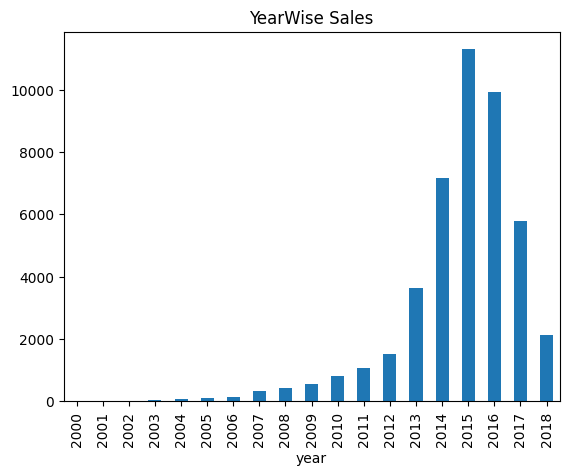

In [11]:
# what was the best year of sales
dataset.groupby('year')['amount'].count().plot(kind='bar',title='YearWise Sales')

<Axes: xlabel='month'>

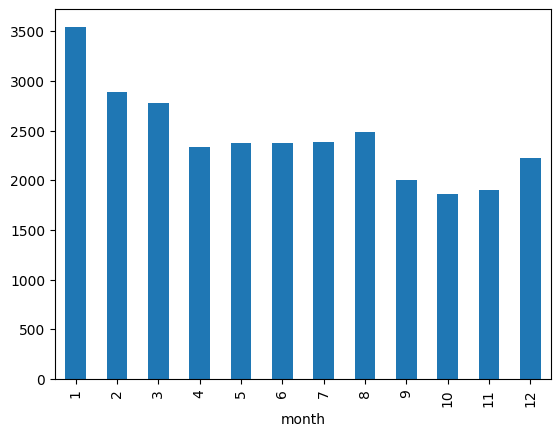

In [12]:
# We can see that the year 2015 to 2018 had the best sales.
# what was the best month of sales
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']
<= 2018)]
dataset_2015_2018.groupby('month')['rating'].count().plot(kind='bar')

<Axes: title={'center': 'Brand Wise Top 10 Sales (2015 to 2018)'}, xlabel='brand', ylabel='Sales Amount'>

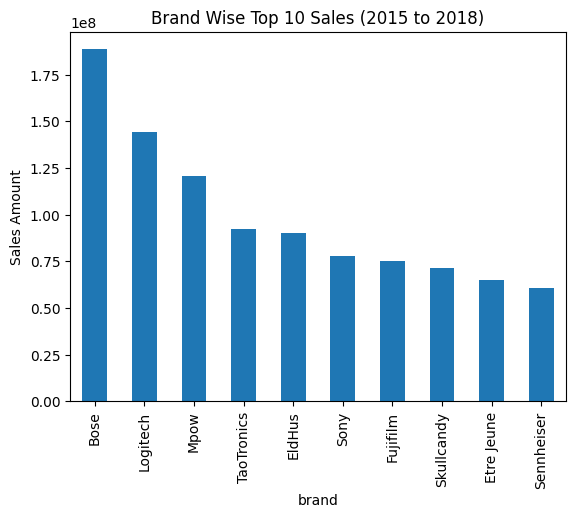

In [13]:
# Filter the dataset for years between 2015 and 2018
dataset_2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year'] <= 2018)]

# Group by brand and sum the sales amount
brand_sales = dataset_2015_2018.groupby('brand')['amount'].sum()

# Sort the sales in descending order and take the top 10 brands
top_10_brands = brand_sales.sort_values(ascending=False).head(10)

# Plot the data as a bar chart
top_10_brands.plot(kind='bar', title='Brand Wise Top 10 Sales (2015 to 2018)', ylabel='Sales Amount')

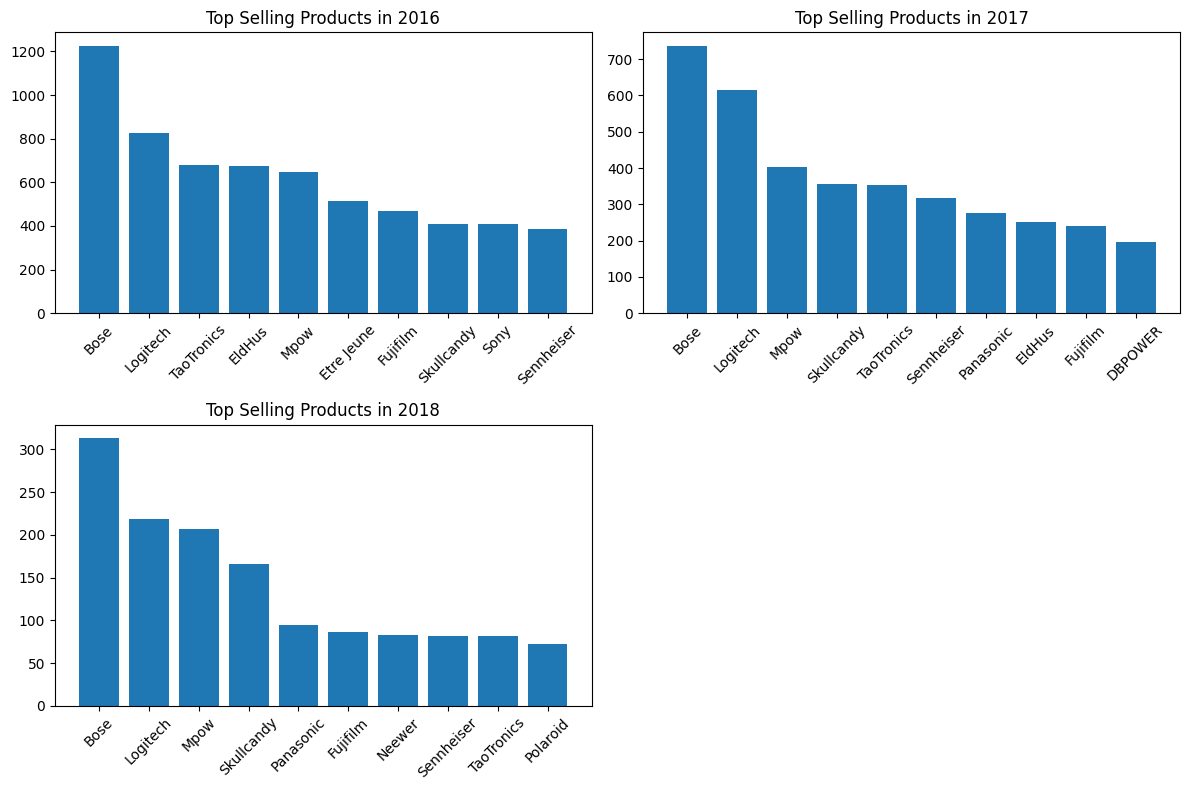

In [14]:
import matplotlib.pyplot as plt

# Create a figure and subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid for subplots

# Function to plot top-selling products for a given year
def plot_top_selling(year, ax, row, col):
    top_selling = (
        dataset[dataset['year'] == year]
        .groupby('brand')['rating']
        .count()
        .sort_values(ascending=False)
        .head(10)
    )

    ax.bar(top_selling.index, top_selling)
    ax.set_title(f'Top Selling Products in {year}')
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Plot for 2016
plot_top_selling(2016, axs[0, 0], 0, 0)

# Plot for 2017
plot_top_selling(2017, axs[0, 1], 0, 1)

# Plot for 2018
plot_top_selling(2018, axs[1, 0], 1, 0)

# Hide the empty subplot (bottom-right)
axs[1, 1].axis('off')

# Adjust layout for better appearance
plt.tight_layout()

# Show the plots
plt.show()


<Axes: title={'center': 'Top 10 Most Sold ProductCategory 2015 to 2018'}, xlabel='category'>

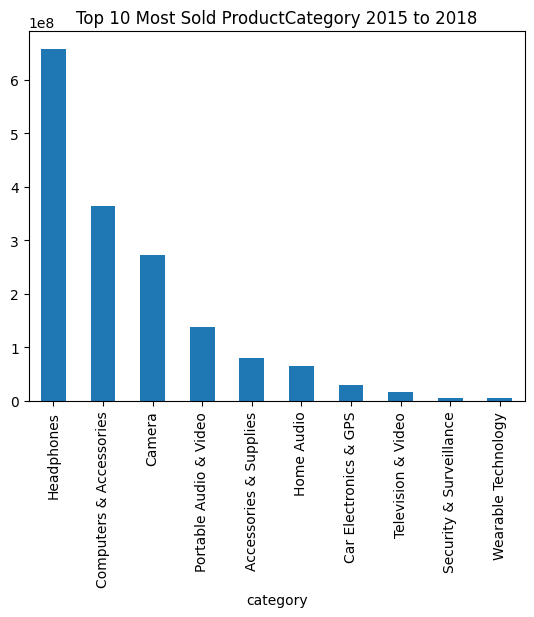

In [15]:
# # What product by category sold the most between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=False).head(10).plot(kind='bar',title='Top 10 Most Sold ProductCategory 2015 to 2018')

<Axes: title={'center': '10 Least Sold Product Brand2015 to 2018'}, xlabel='category'>

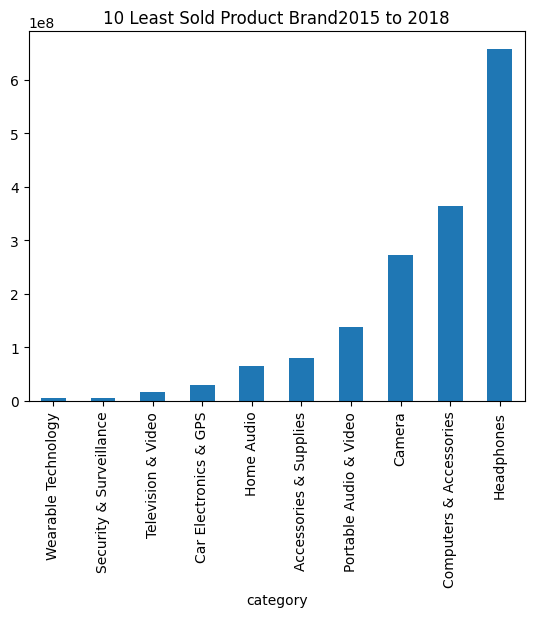

In [16]:
# What product by brand name sold the least between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('category')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand2015 to 2018')

<Axes: title={'center': '10 Least Sold Product Brand 2015to 2018'}, xlabel='brand'>

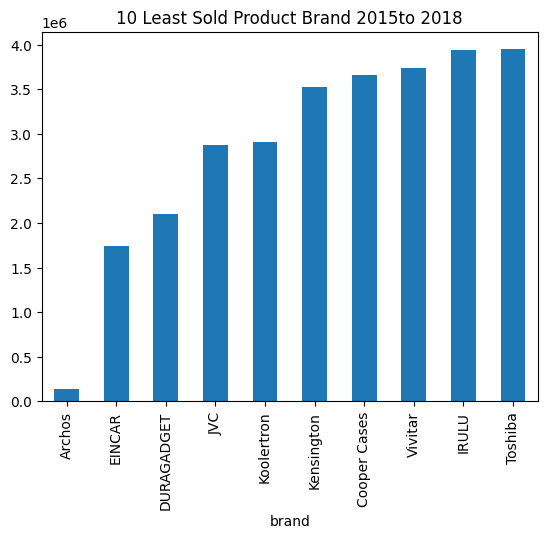

In [17]:
# What product by brand name sold the least between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('brand')['amount'].sum().sort_values(ascending=True).head(10).plot(kind='bar',title='10 Least Sold Product Brand 2015to 2018')

<Axes: xlabel='rating', ylabel='count'>

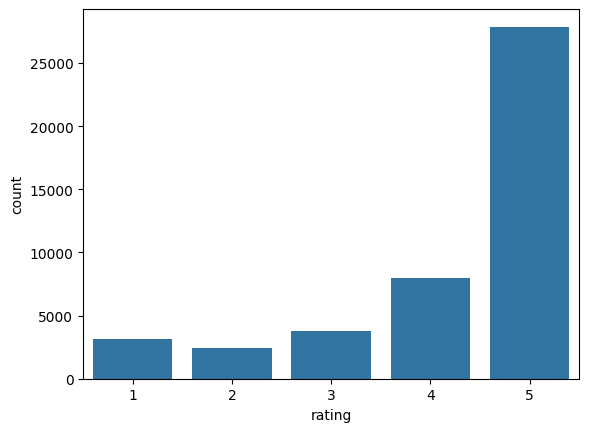

In [18]:
# # the distribution of ratings
sns.countplot(x='rating', data=dataset)

<Axes: title={'center': '10 most rating Brand 2015 to2018'}, xlabel='brand'>

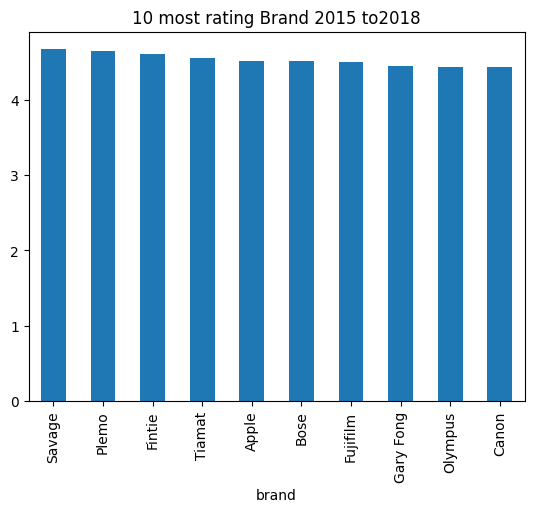

In [19]:
# What is the most rated brand name between 2015 to 2018?
dataset2015_2018 = dataset[(dataset['year'] >= 2015) & (dataset['year']<= 2018)]
dataset2015_2018.groupby('brand')['rating'].mean().sort_values(ascending=False).head(10).plot(kind='bar',title='10 most rating Brand 2015 to2018')

<Axes: title={'center': 'Top 5 category salespercentage'}, ylabel='amount'>

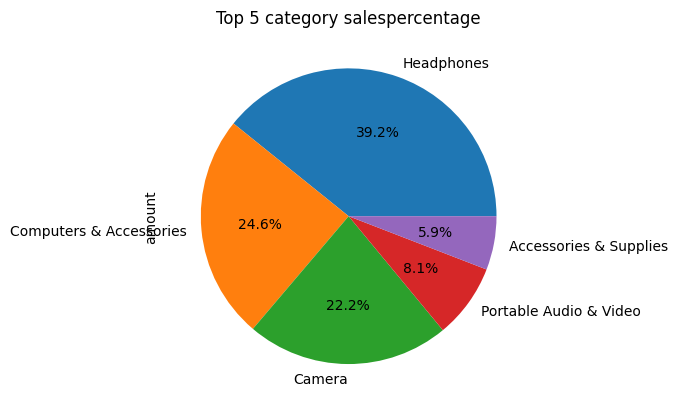

In [20]:
# category percentage sales
dataset.groupby('category')['amount'].sum().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 category salespercentage')

<Axes: title={'center': 'Top 5 Brand wise salespercentage'}, ylabel='rating'>

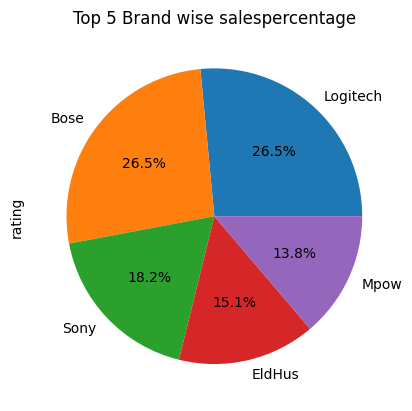

In [21]:
# brand wise sales percentage
dataset.groupby('brand')['rating'].count().sort_values(ascending=False).head(5).plot(kind='pie', autopct='%1.1f%%',title='Top 5 Brand wise salespercentage')

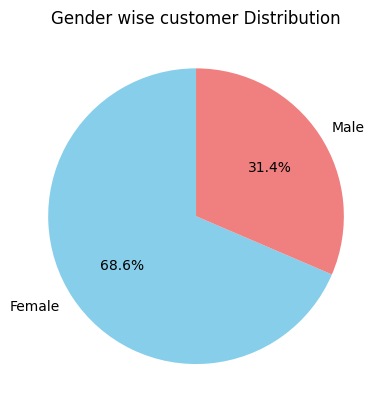

In [22]:
# Gender wise customer distribution
gender_distribution = dataset['gender'].value_counts()
plt.pie(gender_distribution, labels=gender_distribution.index,
autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender wise customer Distribution')
plt.show()